## TASK-02 CREDIT CARD FRAUD DETECTION

### IMPORTING THE REQUIRED LIBRARIES:

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.under_sampling import RandomUnderSampler

### LOADING THE DATASET:

In [2]:
train_df = pd.read_csv("fraudTrain.csv")
test_df = pd.read_csv("fraudTest.csv")

In [3]:
train_df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [4]:
test_df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


### GETTING DATA INFORMATION:

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

### DESCRIBING THE DATA:

In [6]:
train_df.describe( include = "all")

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1296675,1.296675e+06,1296675,1296675,1.296675e+06,1296675,1296675,1296675,1296675,...,1.296675e+06,1.296675e+06,1.296675e+06,1296675,1296675,1296675,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
unique,NaN,1274791,NaN,693,14,NaN,352,481,2,983,...,NaN,NaN,NaN,494,968,1296675,NaN,NaN,NaN,NaN
top,NaN,2019-04-22 16:02:01,NaN,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,864 Reynolds Plains,...,NaN,NaN,NaN,Film/video editor,1977-03-23,3e4b9729874087a96647a1a691dc1651,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,4403,131659,NaN,26669,28794,709863,3123,...,NaN,NaN,NaN,9779,5636,1,NaN,NaN,NaN,NaN
mean,6.483370e+05,NaN,4.171920e+17,NaN,NaN,7.035104e+01,NaN,NaN,NaN,NaN,...,3.853762e+01,-9.022634e+01,8.882444e+04,NaN,NaN,NaN,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,NaN,1.308806e+18,NaN,NaN,1.603160e+02,NaN,NaN,NaN,NaN,...,5.075808e+00,1.375908e+01,3.019564e+05,NaN,NaN,NaN,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,NaN,6.041621e+10,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,...,2.002710e+01,-1.656723e+02,2.300000e+01,NaN,NaN,NaN,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,NaN,1.800429e+14,NaN,NaN,9.650000e+00,NaN,NaN,NaN,NaN,...,3.462050e+01,-9.679800e+01,7.430000e+02,NaN,NaN,NaN,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,NaN,3.521417e+15,NaN,NaN,4.752000e+01,NaN,NaN,NaN,NaN,...,3.935430e+01,-8.747690e+01,2.456000e+03,NaN,NaN,NaN,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,NaN,4.642255e+15,NaN,NaN,8.314000e+01,NaN,NaN,NaN,NaN,...,4.194040e+01,-8.015800e+01,2.032800e+04,NaN,NaN,NaN,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00


### CHECKING THE NULL VALUES:

In [7]:
train_df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

### CHECKING THE NULL VALUES FOR TEST DATA:

In [8]:
test_df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

### CHECKING THE DUPLICATE VALUES:

In [10]:
train_df.duplicated().sum()

0

In [11]:
test_df.duplicated().sum()

0

In [12]:
# Checking the single rows of data:
train_df.iloc[0,:]

Unnamed: 0                                              0
trans_date_trans_time                 2019-01-01 00:00:18
cc_num                                   2703186189652095
merchant                       fraud_Rippin, Kub and Mann
category                                         misc_net
amt                                                  4.97
first                                            Jennifer
last                                                Banks
gender                                                  F
street                                     561 Perry Cove
city                                       Moravian Falls
state                                                  NC
zip                                                 28654
lat                                               36.0788
long                                             -81.1781
city_pop                                             3495
job                             Psychologist, counselling
dob           

### GETTING THE UNIQUE FEATURES:

In [13]:
train_df["trans_num"].nunique()

1296675

### CHECKING UNIQUE VALUES:

In [14]:
for column_name in train_df.columns:
    unique_values = train_df[column_name].nunique()
    print(f'Unique values in column {column_name}: {unique_values}')

Unique values in column Unnamed: 0: 1296675
Unique values in column trans_date_trans_time: 1274791
Unique values in column cc_num: 983
Unique values in column merchant: 693
Unique values in column category: 14
Unique values in column amt: 52928
Unique values in column first: 352
Unique values in column last: 481
Unique values in column gender: 2
Unique values in column street: 983
Unique values in column city: 894
Unique values in column state: 51
Unique values in column zip: 970
Unique values in column lat: 968
Unique values in column long: 969
Unique values in column city_pop: 879
Unique values in column job: 494
Unique values in column dob: 968
Unique values in column trans_num: 1296675
Unique values in column unix_time: 1274823
Unique values in column merch_lat: 1247805
Unique values in column merch_long: 1275745
Unique values in column is_fraud: 2


### DROPPING THE UNNECESSARY COLUMNS:

In [15]:
dropColumn =["Unnamed: 0","job" ,"cc_num","trans_num","zip" ,"unix_time","merch_lat","merch_long","dob","first","last","street","city"] 
train_df.drop(dropColumn,axis = 1,inplace = True)
test_df.drop(dropColumn,axis = 1,inplace = True)

In [16]:
train_df.head()

,trans_date_trans_time,merchant,category,amt,gender,state,lat,long,city_pop,is_fraud
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,NC,36.0788,-81.1781,3495,0
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,WA,48.8878,-118.2105,149,0
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,ID,42.1808,-112.2620,4154,0
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,MT,46.2306,-112.1138,1939,0
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,VA,38.4207,-79.4629,99,0


### CONVERTING TIME INTO DAYS OF WEEK:

In [17]:
def datetoDay(time):
    timestamp = datetime.strptime(time, "%Y-%m-%d %H:%M:%S")

    # Get the day of the week as a string
    day_of_week = timestamp.strftime("%A")
    return day_of_week

### APPLYING CONVERSION ON EACH SAMPLE OF TEST & TRAIN:

In [18]:
train_df["trans_date_trans_time"] = train_df["trans_date_trans_time"].apply(datetoDay)
test_df["trans_date_trans_time"] = test_df["trans_date_trans_time"].apply(datetoDay)

In [19]:
train_df["trans_date_trans_time"]

0          Tuesday
1          Tuesday
2          Tuesday
3          Tuesday
4          Tuesday
            ...   
1296670     Sunday
1296671     Sunday
1296672     Sunday
1296673     Sunday
1296674     Sunday
Name: trans_date_trans_time, Length: 1296675, dtype: object

In [20]:
test_df["trans_date_trans_time"]

0           Sunday
1           Sunday
2           Sunday
3           Sunday
4           Sunday
            ...   
555714    Thursday
555715    Thursday
555716    Thursday
555717    Thursday
555718    Thursday
Name: trans_date_trans_time, Length: 555719, dtype: object

In [21]:
train_df.head()

,trans_date_trans_time,merchant,category,amt,gender,state,lat,long,city_pop,is_fraud
0,Tuesday,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,NC,36.0788,-81.1781,3495,0
1,Tuesday,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,WA,48.8878,-118.2105,149,0
2,Tuesday,fraud_Lind-Buckridge,entertainment,220.11,M,ID,42.1808,-112.2620,4154,0
3,Tuesday,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,MT,46.2306,-112.1138,1939,0
4,Tuesday,fraud_Keeling-Crist,misc_pos,41.96,M,VA,38.4207,-79.4629,99,0


### CHECKING THE IMBALANCED DATA:

In [22]:
train_df["is_fraud"].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

### VISUALIZING THE DATA:

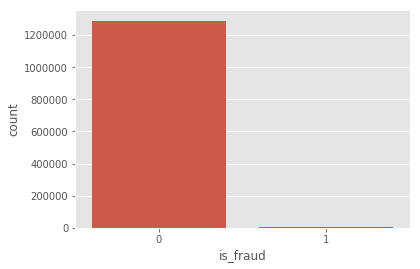

In [23]:
plt.style.use("ggplot")
sns.countplot(x= train_df["is_fraud"])

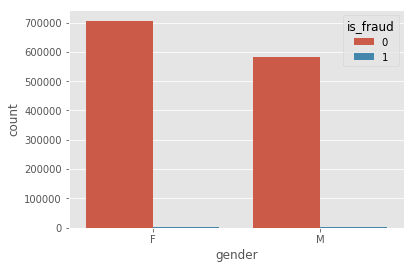

In [24]:
sns.countplot(x= train_df["gender"],hue = "is_fraud",data = train_df)

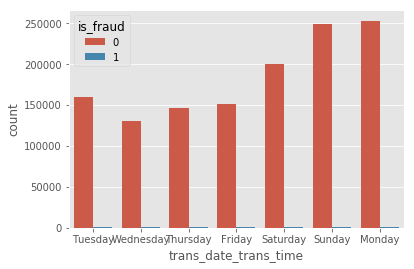

In [25]:
sns.countplot(x= train_df["trans_date_trans_time"],hue = "is_fraud",data = train_df)

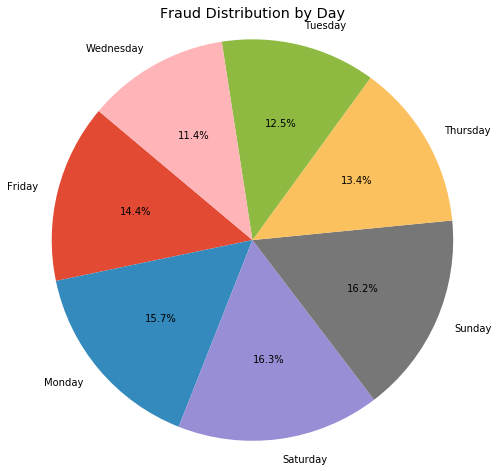

In [26]:
fraud_by_day = train_df.groupby('trans_date_trans_time')['is_fraud'].sum()

plt.figure(figsize=(8, 8))
plt.pie(fraud_by_day, labels=fraud_by_day.index, autopct='%1.1f%%', startangle=140)
plt.title('Fraud Distribution by Day')
plt.axis('equal')

plt.show()

### PREPROCESSING THE DATA:

In [27]:
# IMPORTING LIBRARIES FOR PREPROCESSING:

from sklearn.preprocessing import OneHotEncoder , StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer 

x_train = train_df.drop("is_fraud" ,axis = 1)
y_train = train_df["is_fraud"]

x_test = test_df.drop("is_fraud" ,axis = 1)
y_test = test_df["is_fraud"]


categ = ["trans_date_trans_time","merchant","category","gender","state"]
numeric = ["amt","lat" ,"long" ,"city_pop"]



encoder = OneHotEncoder()
scaler = StandardScaler()

transf = ColumnTransformer(transformers = [("categorical",encoder ,categ),
                                            ("num",scaler,numeric)],remainder="passthrough")
x_train = transf.fit_transform(x_train)
x_test = transf.transform(x_test)

### GETTING THE SHAPE FOR TRAIN & TEST:

In [28]:
x_train.shape,x_test.shape ,y_train.shape ,y_test.shape

((1296675, 771), (555719, 771), (1296675,), (555719,))

In [29]:
def model_testing(estimator):
    # PREDICTION ON DATA:
    y_preds = estimator.predict(x_test)
     
    print("Accuracy Score : ",accuracy_score(y_test,y_preds))

    print("\nConfussion Matrix :\n " ,confusion_matrix(y_test ,y_preds),"\n")

    print("classification_report: \n\n",classification_report(y_test ,y_preds))

### IMPORTING THE PACKAGES FOR TRAINING VARIOUS MODELS:

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

### USING LogisticRegression WITHOUT BALANCING DATA:

In [31]:
model = LogisticRegression()
model.fit(x_train ,y_train)
model_testing(model)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy Score :  0.995531914510751

Confussion Matrix :
  [[553235    339]
 [  2144      1]] 

classification_report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



### USING DecisionTreeClassifier WITHOUT BALANCING DATA:

In [32]:
## Logistic regression without balancing data
dt = DecisionTreeClassifier()
dt.fit(x_train ,y_train)
model_testing(dt)
dt.score(x_test ,y_test)

Accuracy Score :  0.9964136551026688

Confussion Matrix :
  [[552471   1103]
 [   890   1255]] 

classification_report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.53      0.59      0.56      2145

    accuracy                           1.00    555719
   macro avg       0.77      0.79      0.78    555719
weighted avg       1.00      1.00      1.00    555719



0.9964136551026688

### BALANCING THE IMBALANCED DATA BY APPLYING UNDERSAMPLING:

In [33]:
from imblearn.under_sampling import RandomUnderSampler

sampler = RandomUnderSampler()

x_train = train_df.drop("is_fraud" ,axis = 1)
y_train = train_df["is_fraud"]

x_test = test_df.drop("is_fraud" ,axis = 1)
y_test = test_df["is_fraud"]

x_sampled ,y_sampled =sampler.fit_resample(x_train ,y_train) 

categ = ["trans_date_trans_time","merchant","category","gender","state"]
numeric = ["amt","lat" ,"long" ,"city_pop"]



encoder = OneHotEncoder()
scaler = StandardScaler()

transf = ColumnTransformer(transformers = [("categorical",encoder ,categ),
                                            ("num",scaler,numeric)],remainder="passthrough")
x_train = transf.fit_transform(x_sampled)
x_test = transf.transform(x_test)

### GETTING SHAPE OF EACH DATA:

In [34]:
x_train.shape,x_test.shape ,y_sampled.shape ,y_test.shape

((15012, 771), (555719, 771), (15012,), (555719,))

### USING LogisticRegression AFTER BALANCING DATA:

In [35]:
model = LogisticRegression()
model.fit(x_train ,y_sampled)
model_testing(model)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy Score :  0.8855446727572748

Confussion Matrix :
  [[490510  63064]
 [   541   1604]] 

classification_report: 

               precision    recall  f1-score   support

           0       1.00      0.89      0.94    553574
           1       0.02      0.75      0.05      2145

    accuracy                           0.89    555719
   macro avg       0.51      0.82      0.49    555719
weighted avg       1.00      0.89      0.94    555719



### USING DecisionTreeClassifier AFTER BALANCING DATA:

In [36]:
## Logistic regression without balancing data
dt = DecisionTreeClassifier()
dt.fit(x_train ,y_sampled)
model_testing(dt)
dt.score(x_test ,y_test)

Accuracy Score :  0.9544877896922725

Confussion Matrix :
  [[528394  25180]
 [   112   2033]] 

classification_report: 

               precision    recall  f1-score   support

           0       1.00      0.95      0.98    553574
           1       0.07      0.95      0.14      2145

    accuracy                           0.95    555719
   macro avg       0.54      0.95      0.56    555719
weighted avg       1.00      0.95      0.97    555719



0.9544877896922725